# Wine Quality

### Conocimiento y Limpieza de datos

In [2]:
# Librerias para la exploracion y transformaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
X = wine_quality.data.features
y = wine_quality.data.targets
  
# variable information 
print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [4]:
# Dataframe a trabajar
df = pd.concat([X, y], axis=1)

In [5]:
# Tamaño y forma del dataframe
df.shape  # Se muestra la cantidad de filas y columnas en el dataframe.

(6497, 12)

In [6]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [8]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Se ve que todos tienen tipos de dato numérico, lo cual indica que vamos a poder trabajar con los datos sin necesidad de trabajar con variables categoricas.

In [9]:
# Estadísticas descriptivas de las columnas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No se encuentra valores nulos que deban ser tratados

In [11]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(1179)

In [13]:
# En caso de haber duplicados y que corresponda la eliminación de los mismos
df = df.drop_duplicates()
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Se identificaron 1179 columnas que van a ser eliminadas para limpiar el DF. Representa el 18% del total inicial, por lo que se evaluó bastante antes de tomar la desicion de eliminarlos, usando como criterio que es probable que hayan muchos vinos repetidos, pero a los efectos del modelo de ML se decide sacarlos para trabajar solo con valores unicos para un mejor modelado.

In [14]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato.

float64    11
int64       1
Name: count, dtype: int64

### Exploración

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

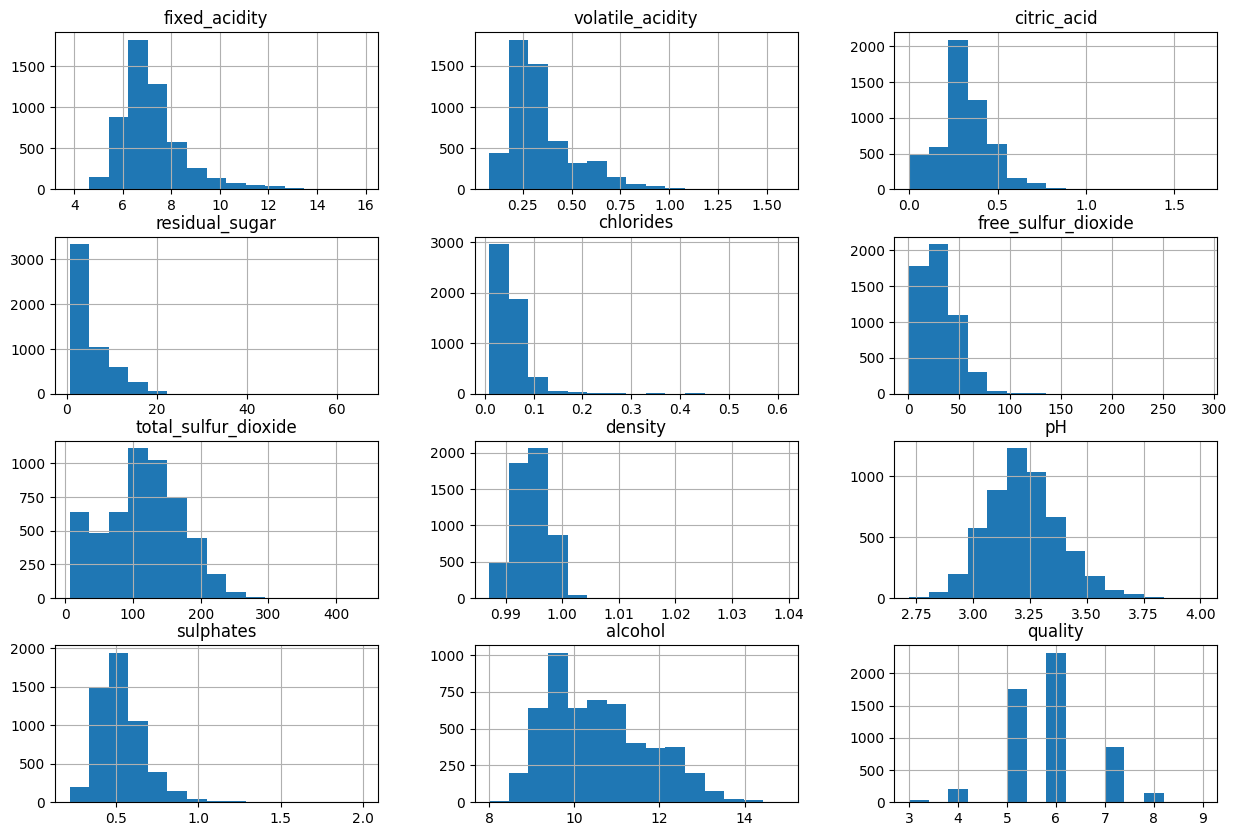

In [15]:
# Visualización de distribuciones numéricas
df.hist(figsize=(15, 10), bins=15)  # Crea histogramas para todas las columnas.

Principalmente se observa que el target es mas frecuente en las calificaciones 5 y 6.

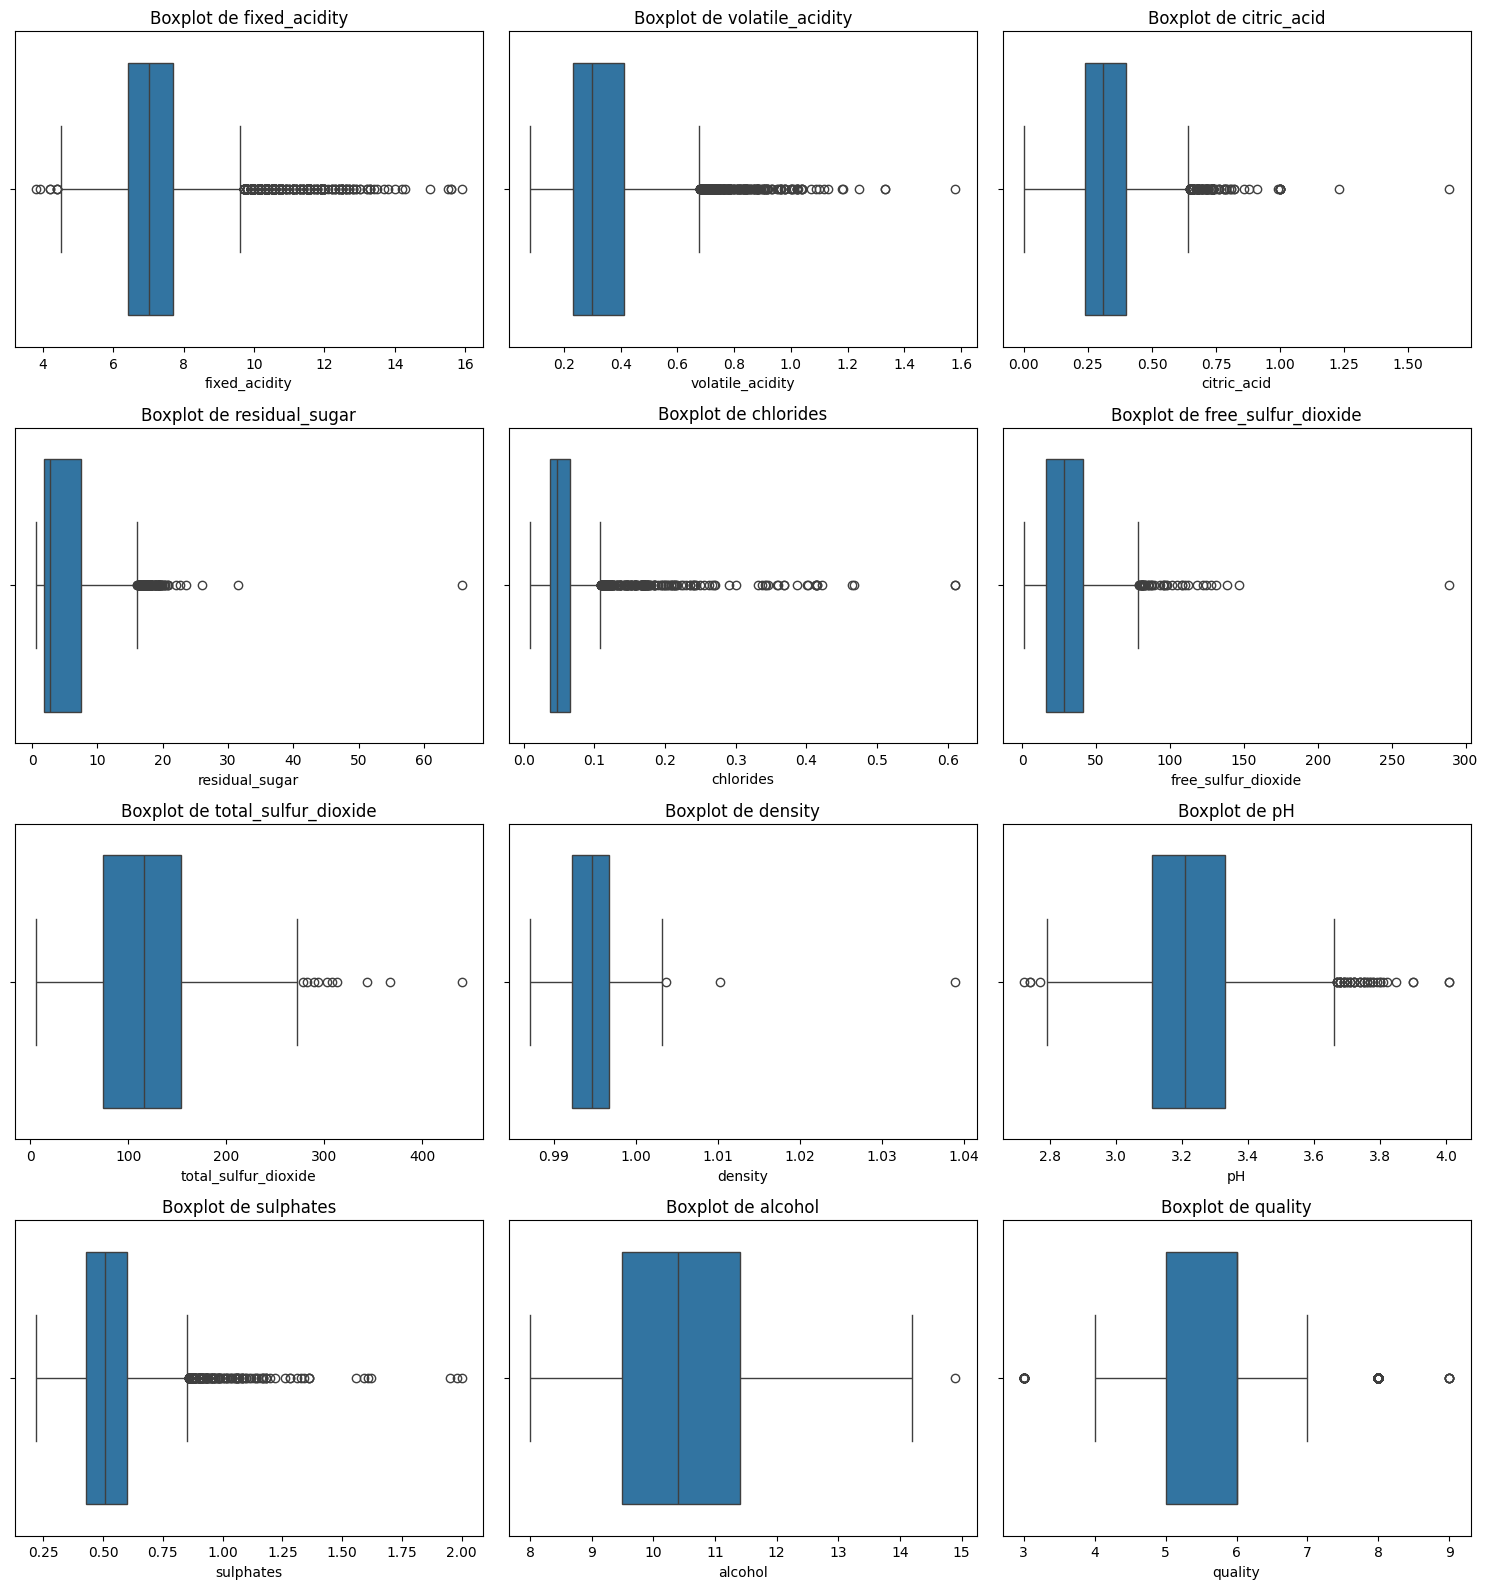

In [16]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

En cuanto al target, se ve claramente como los outliers son las calificaciones 3, 8 y 9, siendo lo normal mantenerse entre 4 y 7.

In [17]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



fixed_acidity - Número de outliers: 304

volatile_acidity - Número de outliers: 279

citric_acid - Número de outliers: 143

residual_sugar - Número de outliers: 141

chlorides - Número de outliers: 237

free_sulfur_dioxide - Número de outliers: 44

total_sulfur_dioxide - Número de outliers: 10

density - Número de outliers: 3

pH - Número de outliers: 49

sulphates - Número de outliers: 163

alcohol - Número de outliers: 1

quality - Número de outliers: 183


Son 183 outliers del target, representando el 3.4% del total actual del DF.

<Axes: >

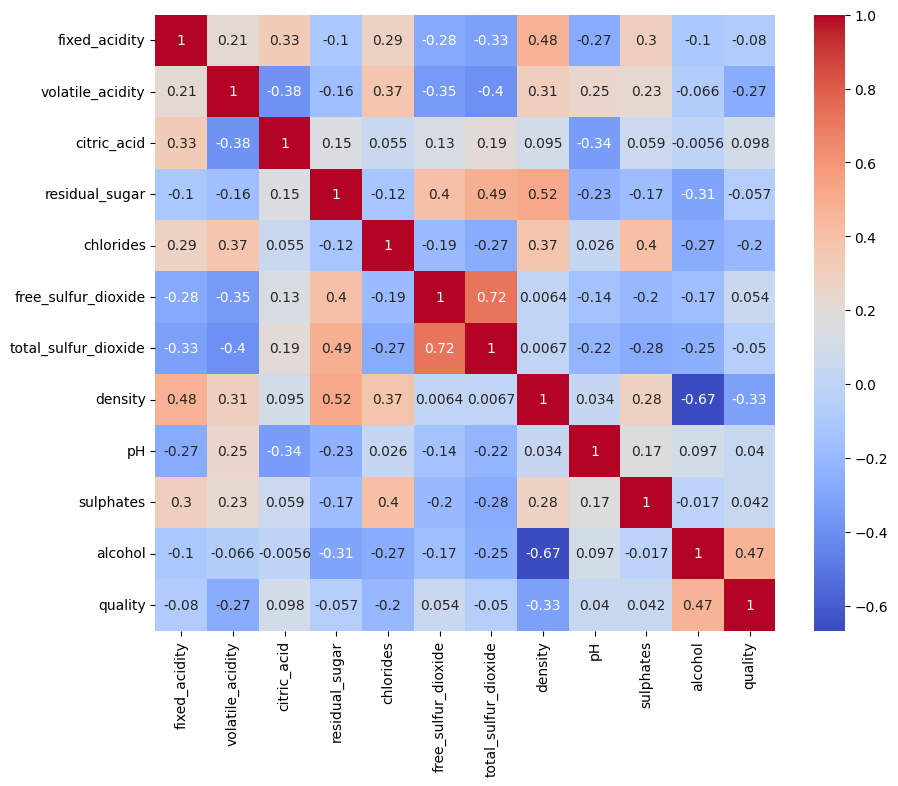

In [18]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualizar la matriz de correlación en un heatmap.

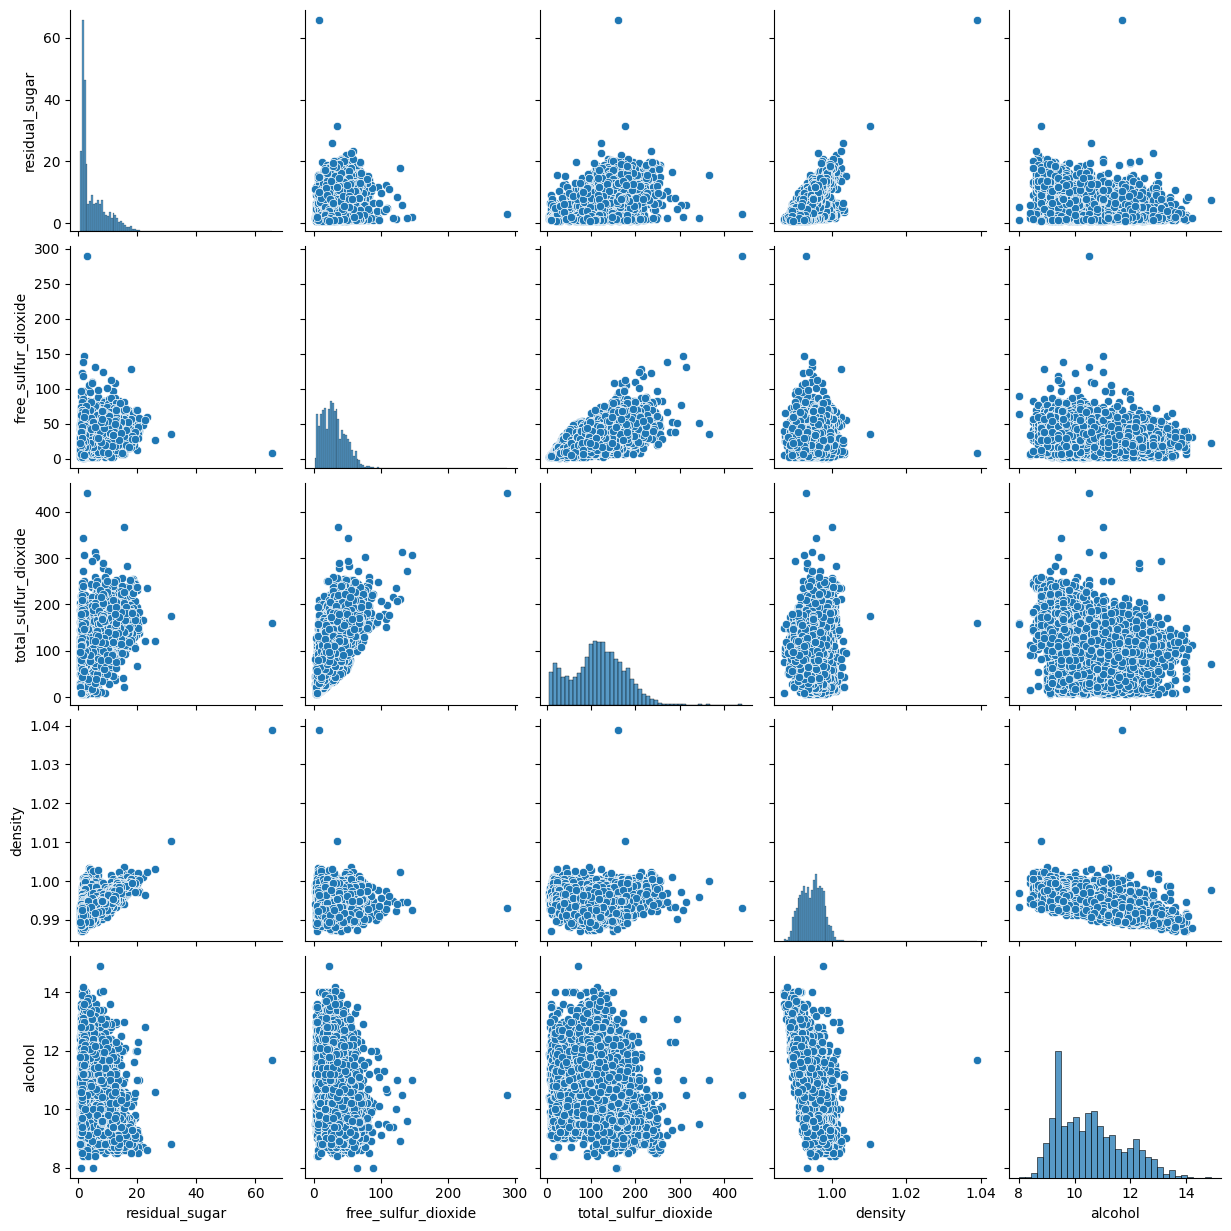

In [19]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Se filtra las variables que tienen una correlación alta
threshold = 0.5
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Se selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Se genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Se muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

In [20]:
#Filtrar las características más importantes para el modelo:

# Definir la variable objetivo (por ejemplo, 'price')
target_variable = 'quality'  # Cambia por el nombre de tu variable objetivo

# Calcular la correlación de todas las columnas con la variable objetivo
correlation_matrix = df.corr()[target_variable]

# Filtrar las columnas que tienen una correlación mayor o igual a 0.1 con la variable objetivo
selected_features = correlation_matrix[correlation_matrix.abs() >= 0.1].index

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df_selected = df[selected_features]

print("Columnas seleccionadas:")
print(selected_features)
print("\nDataFrame con columnas seleccionadas:")
print(df_selected.head())

Columnas seleccionadas:
Index(['volatile_acidity', 'chlorides', 'density', 'alcohol', 'quality'], dtype='object')

DataFrame con columnas seleccionadas:
   volatile_acidity  chlorides  density  alcohol  quality
0              0.70      0.076   0.9978      9.4        5
1              0.88      0.098   0.9968      9.8        5
2              0.76      0.092   0.9970      9.8        5
3              0.28      0.075   0.9980      9.8        6
5              0.66      0.075   0.9978      9.4        5


### Entrenamiento de modelos

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix

X = df_selected.drop(["quality"], axis=1) # Features
y = df_selected["quality"] # Target

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])


In [23]:
# LOGISTIC REGRESSION

# Crear un Pipeline completo
pipeline_lgr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        penalty='l2',           # Tipo de regularización L2 (Ridge)
        C=1.0,                   # Inverso de la fuerza de regularización
        solver='lbfgs',          # Algoritmo para la optimización
        max_iter=100,            # Número máximo de iteraciones
        tol=1e-4,                # Tolerancia para el criterio de parada
        random_state=42         # Semilla para la reproducibilidad
    ))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_lgr.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_lgr = pipeline_lgr.predict(X_test)

# Evaluar el modelo
accuracy_logr = accuracy_score(y_test, y_pred_lgr)
metrics_logr = classification_report(y_test, y_pred_lgr)

print(f'Exactitud: {accuracy_logr}')
print('Informe de Clasificación:')
print(metrics_logr)

Exactitud: 0.5426065162907269
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.03        57
           5       0.62      0.62      0.62       531
           6       0.51      0.71      0.59       692
           7       0.46      0.16      0.23       269
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1596
   macro avg       0.37      0.22      0.21      1596
weighted avg       0.54      0.54      0.50      1596



C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

La configuración de los hiper parametros, se tomaron los standard de: https://codingdojolatam.la/cursos/machine-learning-mitic-ds-b-septiembre-2024/leccion/optimizacion-introduccion-a-la-regresion-logistica-3-2/

In [24]:
# Entrenamiento del modelo KNN para clasificacion
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Crear un Pipeline con el preprocesador y el regressor
pipeline_knn_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Asegúrate de tener el preprocesador definido
    ('knn', KNeighborsRegressor())  # Aquí inicializamos el modelo KNN sin el parámetro 'n_neighbors'
])

# Probar diferentes valores de K
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    # Ajustar el número de vecinos en cada iteración
    pipeline_knn_c.set_params(knn__n_neighbors=k)
    
    # Validación cruzada con 5 pliegues
    scores = cross_val_score(pipeline_knn_c, X_train, y_train, scoring='accuracy', cv=10)
    
    # Guardar el promedio del accuracy (recuerda que cross_val_score devuelve negativos)
    cv_scores.append(scores.mean())

# Seleccionar el K con el mayor accuracy (máximo valor negativo)
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Mejor valor de K: {optimal_k}')

# Ahora, usa el mejor K encontrado para entrenar el modelo final
pipeline_knn_c.set_params(knn__n_neighbors=optimal_k)
pipeline_knn_c.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_knn_c = pipeline_knn_c.predict(X_test)
metrics_knn_c = classification_report(y_test, y_pred_knn_c)

# Evaluar el modelo
accuracy_knn_c = accuracy_score(y_test, y_pred_knn_c)
print(f'Exactitud: {accuracy_knn_c}')
print('Informe de Clasificación:')
print(metrics_knn_c)

C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoun

Mejor valor de K: 1
Exactitud: 0.4642857142857143
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.10      0.11      0.10        57
           5       0.52      0.53      0.53       531
           6       0.50      0.51      0.50       692
           7       0.39      0.35      0.37       269
           8       0.16      0.18      0.17        39
           9       0.00      0.00      0.00         2

    accuracy                           0.46      1596
   macro avg       0.24      0.24      0.24      1596
weighted avg       0.46      0.46      0.46      1596



C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoun

In [25]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN'],
    'Precision': [accuracy_logr, accuracy_knn_c],
    'Metricas': [metrics_logr, metrics_knn_c]
})

# Imprimir los resultados
print(results)

               Model  Precision  \
0  Linear Regression   0.542607   
1                KNN   0.464286   

                                            Metricas  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  


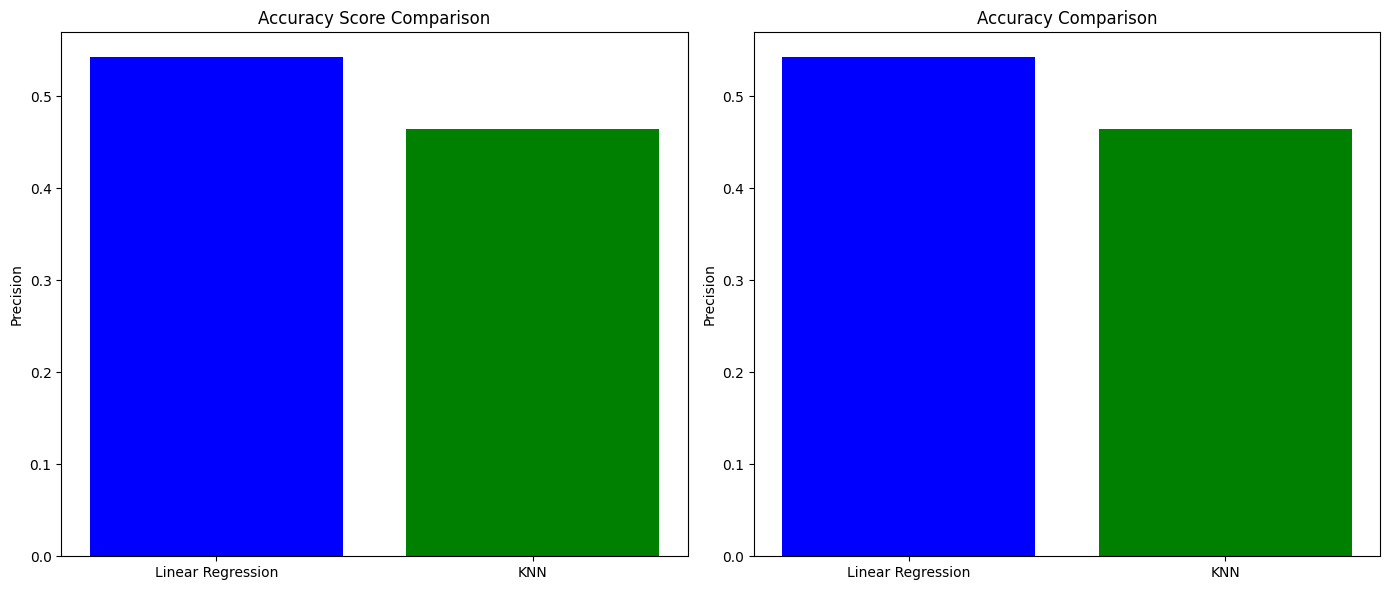

In [26]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de R2
ax[0].bar(results['Model'], results['Precision'], color=['blue', 'green', 'red'])
ax[0].set_title('Accuracy Score Comparison')
ax[0].set_ylabel('Precision')

# Gráfico de Accuracy
ax[1].bar(results['Model'], results['Precision'], color=['blue', 'green', 'red'])
ax[1].set_title('Accuracy Comparison')
ax[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()

In [27]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lgr = measure_training_time(pipeline_lgr, X_train, y_train)
time_knn_c = measure_training_time(pipeline_knn_c, X_train, y_train)

# Agregar el tiempo al DataFrame
results['Training Time (s)'] = [time_lgr, time_knn_c]

# Imprimir los resultados con tiempo de entrenamiento
print(results)

               Model  Precision  \
0  Linear Regression   0.542607   
1                KNN   0.464286   

                                            Metricas  Training Time (s)  
0                precision    recall  f1-score   ...           0.067344  
1                precision    recall  f1-score   ...           0.006603  


### CONCLUSION

Ambos modelos utilizados tienen un bajo accuracy, y tambien las demas metricas como recall, f1-score dan malos resultados, por lo que puedo concluir que ninguno de estos dos modelos son los indicados para poder trabajar en esta prediccion. Se debe avanzar con otros modelos para encontrar el que mejor funcione con este dataset.

También podría ser que falten más caracteristicas relevantes en el dataset.